In [1]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
import numpy as np
import pandas as pd  
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from collections import Counter

### Read the file from GitHub

In [1]:
import pandas as pd
import requests
from io import StringIO

# URL of the CSV file
url = "https://raw.githubusercontent.com/YogevLD/Advanced-Machine-learning/main/Clustering/dailykos.csv"

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Use StringIO to read the CSV data in memory
    data = StringIO(response.content.decode('utf-8'))

    # Load the data using pandas
    df = pd.read_csv(data)

    # Display the first few rows of the DataFrame
else:
    print("Failed to download the file. Status code:", response.status_code)


In [2]:
# Show the data
df

,Document,abandon,abc,ability,abortion,absolute,abstain,abu,abuse,accept,...,yeah,year,yesterday,york,youll,young,youre,youve,zogby,zone
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,1,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3425,3426,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3426,3427,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3427,3428,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3428,3429,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<blockquote>Ward: minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and in this sense is similar to the k-means objective function but tackled with an agglomerative hierarchical approach..</blockquote>

<blockquote> Maximum or complete linkage minimizes the maximum distance between observations of pairs of clusters.</blockquote>

<blockquote> Average linkage minimizes the average of the distances between all observations of pairs of clusters.</blockquote>

<blockquote> Single linkage minimizes the distance between the closest observations of pairs of clusters.</blockquote>

<blockquote>Each of these methods has its own strengths and weaknesses, and the choice of method can significantly affect the outcome of the hierarchical clustering.</blockquote>

#### This information is based on the scikit-learn's documentation, For more detailed explanations and additional information-
[scikit-learn:hierarchical-clustering](https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering)

In [11]:
linkage_type= ['ward','average','complete','single']

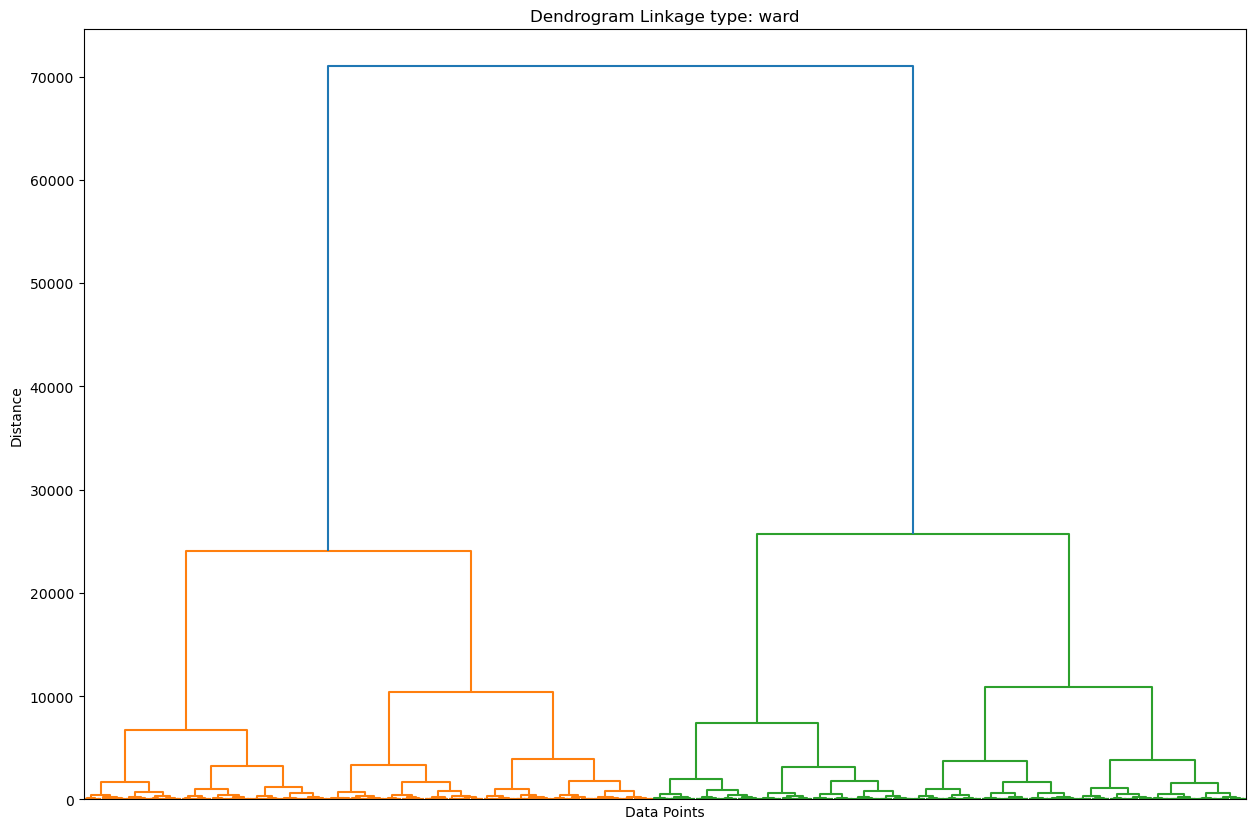

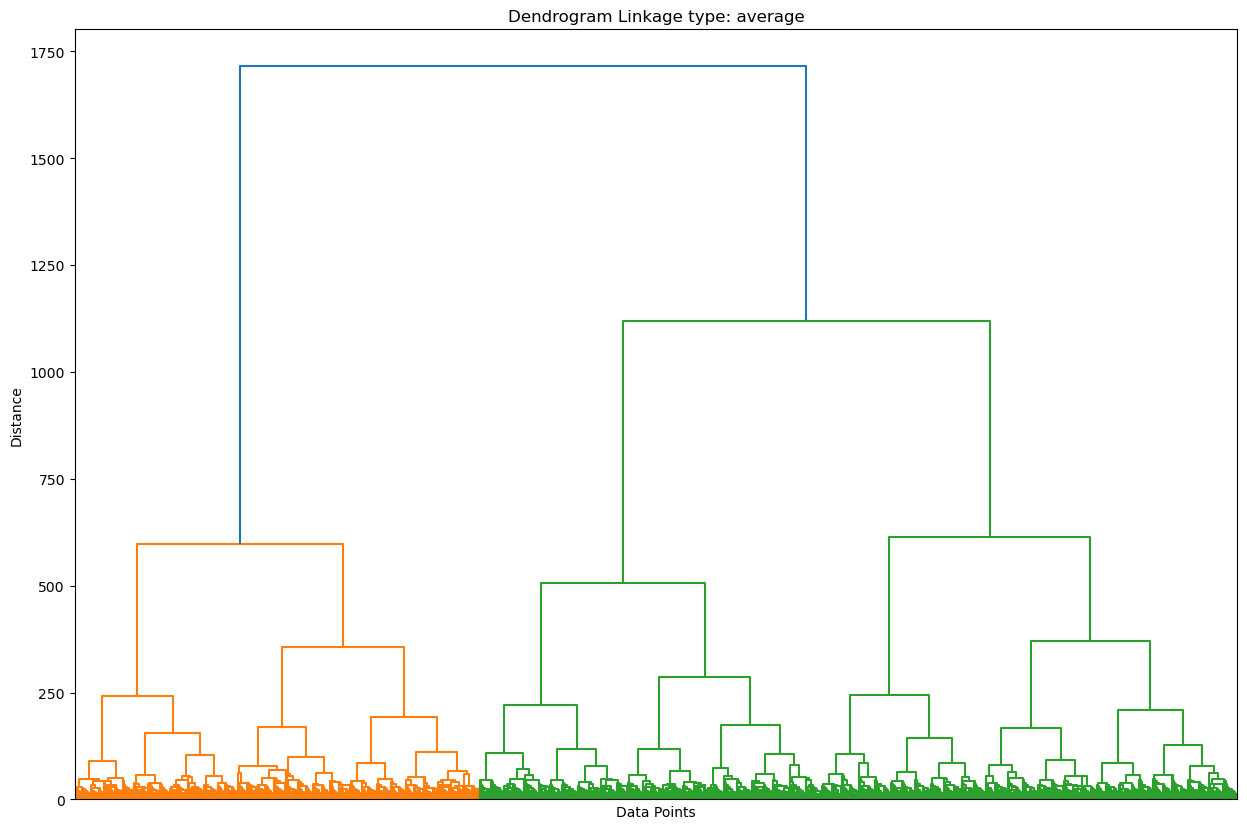

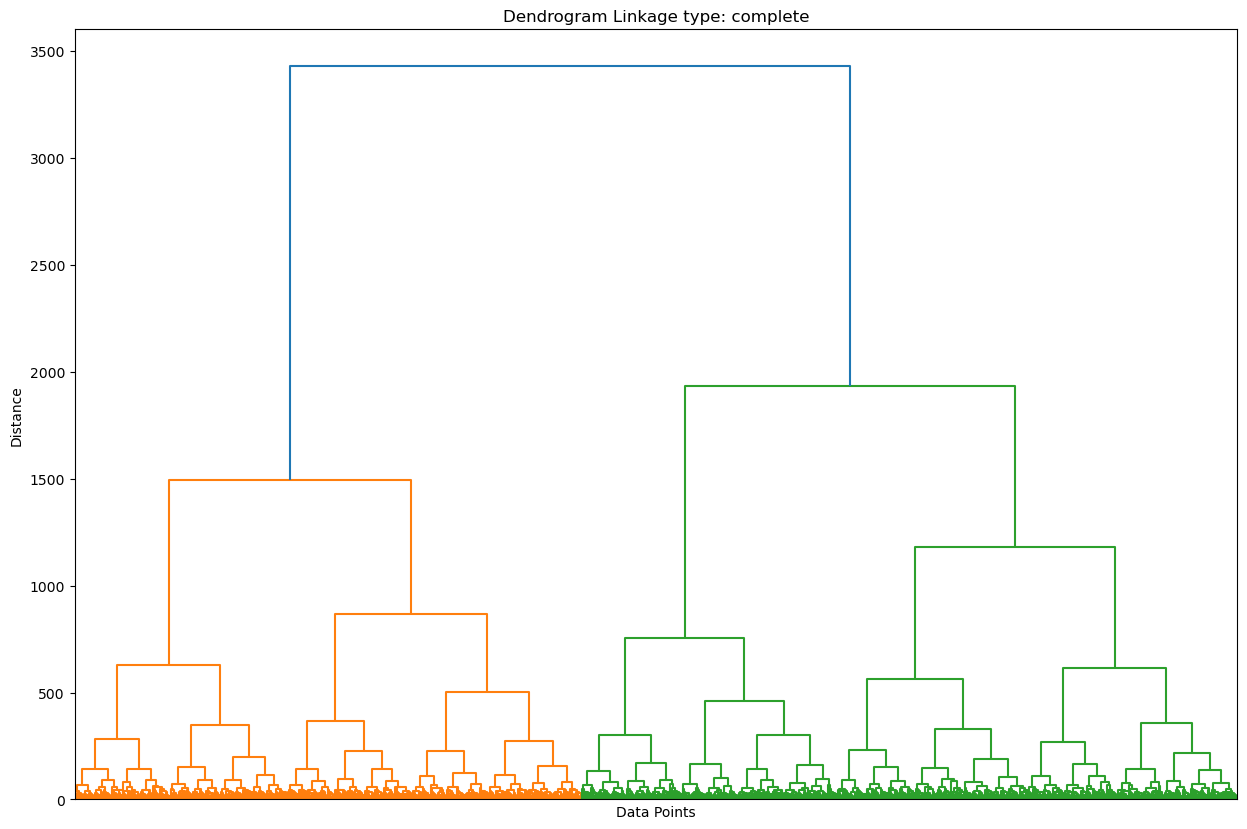

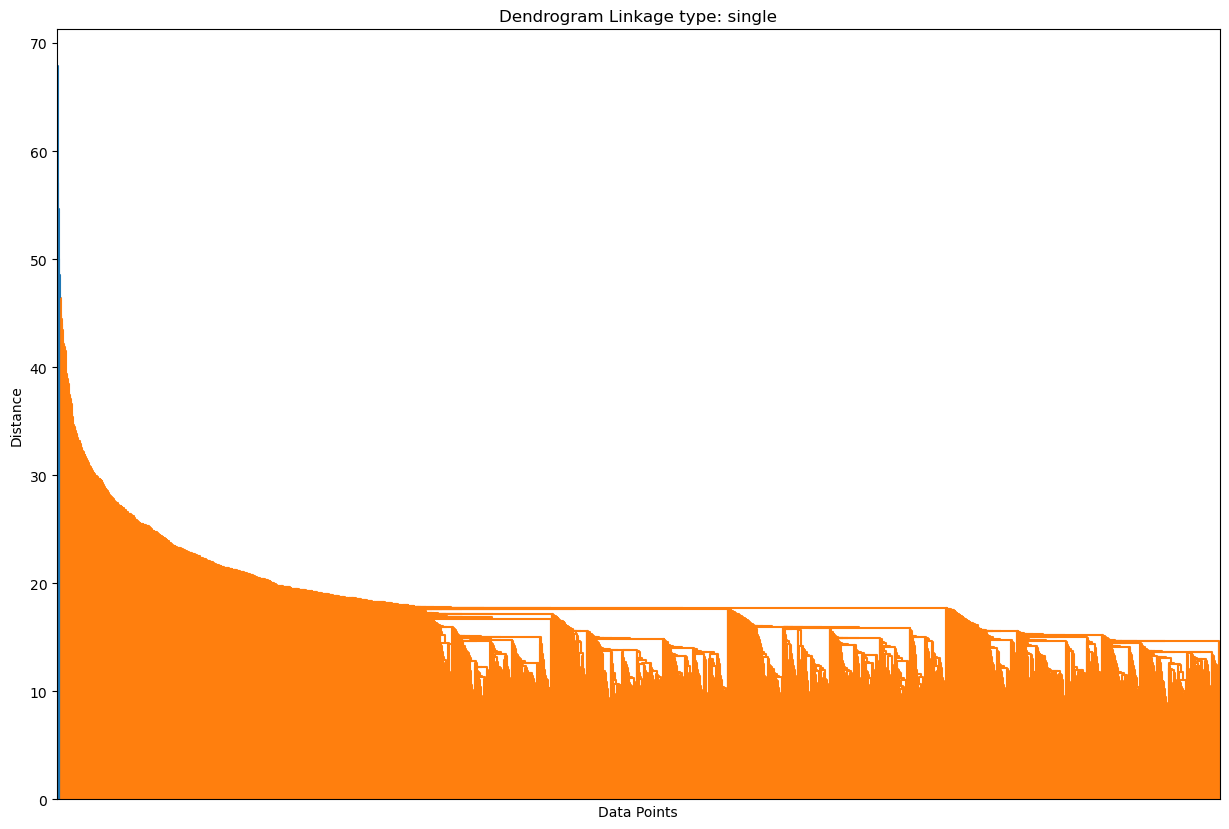

In [5]:

for linkage in linkage_type:
    # Create Agglomerative Clustering model with the correct parameters from the loop
    cluster = AgglomerativeClustering(n_clusters=None, metric='euclidean', linkage=linkage, distance_threshold=0 )

    # Fit and predict clusters
    cluster_labels = cluster.fit_predict(df_array)

    # Plotting the dendrogram 
    plt.figure(figsize=(15, 10))
    dendrogram = sch.dendrogram(sch.linkage(df_array, method=linkage),orientation='top',leaf_rotation=90)
    plt.title(f"Dendrogram Linkage type: {linkage}")
    plt.xlabel('Data Points')
    plt.ylabel('Distance')
    plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)  # Hide x-axis tick labels
    plt.show()
    
    # Add cluster labels to DataFrame (optional)
    df[f'cluster_labels_{linkage}'] = cluster_labels

<span style="font-size: 22px;"> **Conclusion**</span>

<span style="font-size: 18px;">In my assessment, the Ward method emerges as the most effective choice within this context. Its notable resilience to minor variations becomes evident when examining the dendrogram, where it consistently produces well-defined clusters.
Conversely, the other methods exhibit heightened sensitivity, resulting in less clarity within the dendrogram and an increased risk of overfitting.</span>


<span style="font-size: 22px;">**K-means**</span>

K-means clustering tries to group similar kinds of items in form of clusters. It finds the similarity between the items and groups them into the clusters. K-means clustering algorithm works in three steps.

1. Select the k values.
2. Initialize the centroids.
3. Select the group and find the average.

![K-means Image](https://github.com/YogevLD/Advanced-Machine-learning/blob/main/Clustering/images/pic%20for%20k-%20means.png?raw=true)

1. Figure 1 shows the representation of data of two different items. the first item has shown in blue color and the second item has shown in red color. Here I am choosing the value of K randomly as 2. There are different methods by which we can choose the right k values.
2. In figure 2, Join the two selected points. Now to find out centroid, we will draw a perpendicular line to that line. The points will move to their centroid. If you will notice there, then you will see that some of the red points are now moved to the blue points. Now, these points belong to the group of blue color items.
3. The same process will continue in figure 3. we will join the two points and draw a perpendicular line to that and find out the centroid. Now the two points will move to its centroid and again some of the red points get converted to blue points.
4. The same process is happening in figure 4. This process will be continued until and unless we get two completely different clusters of these groups.
**NOTE**: Please note that the K-means clustering uses the euclidean distance method to find out the distance between the points.


<span style="font-size: 22px;">**Elbow Method, SSE and Silhouette**</span>

<span style="font-size: 18px;"> We will plot a graph between k-values and the within-cluster sum of the square to get the k value. we will examine the graph carefully. At some point, our graph will decrease abruptly. That point will be considered as a value of k.</span>

<span style="font-size: 18px;"> The silhouette method is somewhat different. The elbow method it also picks up the range of the k values and draws the silhouette graph. It calculates the silhouette coefficient of every point. It calculates the average distance of points within its cluster a (i) and the average distance of the points to its next closest cluster called b (i). </span>

<p float="left">
  <img src="https://github.com/YogevLD/Advanced-Machine-learning/blob/main/Clustering/images/Elbow%20pic.png?raw=true" width="400" />
  <img src="https://github.com/YogevLD/Advanced-Machine-learning/blob/main/Clustering/images/Silhouette%20pic.png?raw=true" width="400" /> 
</p>
<span style="font-size: 18px;"> Now, we can calculate the silhouette coefficient of all the points in the clusters and plot the silhouette graph. This plot will also helpful in detecting the outliers. The plot of the silhouette is between -1 to 1, 1 is the best value and -1 is the worst value.
</span>

#### This information is based on the Analystic Vidhaya,, For more detailed explanations and additional information- [A Simple Explanation of K-Means Clustering](https://www.analyticsvidhya.com/blog/2020/10/a-simple-explanation-of-k-means-clustering/)

In [17]:
df_array=pd.DataFrame(df).drop("Document",axis=1)
df_array.head()

,abandon,abc,ability,abortion,absolute,abstain,abu,abuse,accept,access,...,yeah,year,yesterday,york,youll,young,youre,youve,zogby,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,0


In [18]:

def silhouette_plot(data, cluster_labels, num_clusters, ax):
    silhouette_avg = silhouette_score(data, cluster_labels)
    silhouette_values = silhouette_samples(data, cluster_labels)
    
    y_lower = 10
    for i in range(num_clusters):
        ith_cluster_silhouette_values = silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        color = cm.nipy_spectral(float(i) / num_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 for the 0 samples gap
    
    ax.set_title(f"Silhouette analysis for k = {num_clusters}")
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")
    
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax.set_yticks([])  # Clear the yaxis labels / ticks
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

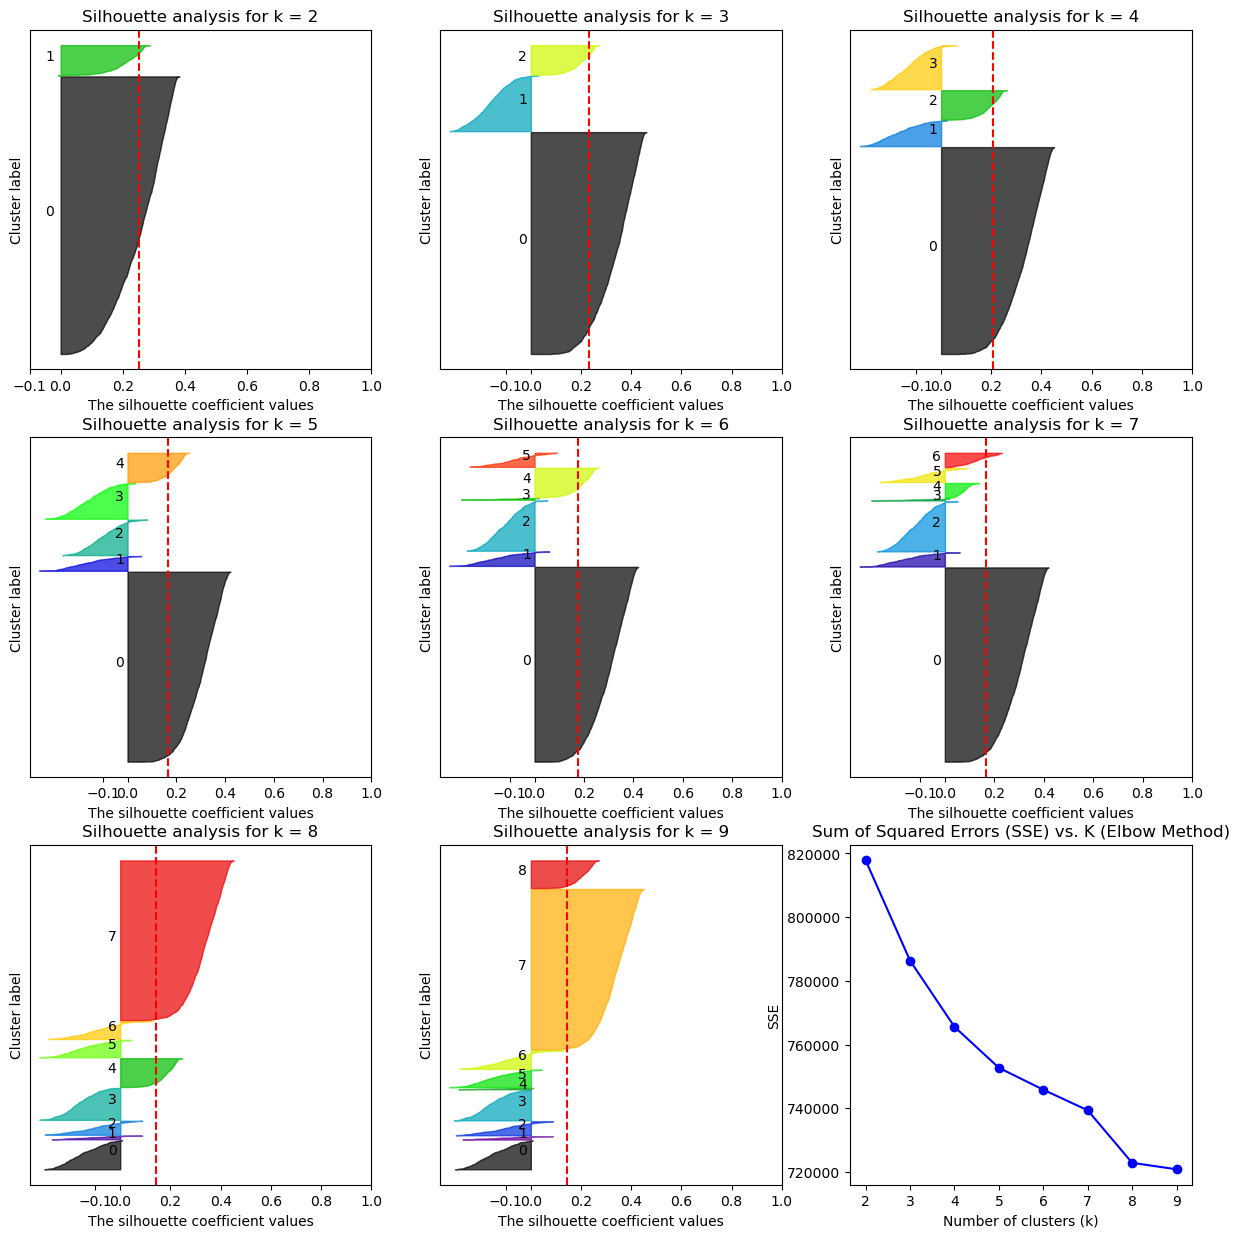

<Figure size 640x480 with 0 Axes>

,K,SSE,Silhouette,Min Cluster Size,Max Cluster Size,Min Cluster,Max Cluster
0,2.0,817799.896869,0.251754,338.0,3092.0,1.0,0.0
1,3.0,786339.072244,0.232312,331.0,2479.0,2.0,0.0
2,4.0,765576.556659,0.206417,287.0,2318.0,1.0,0.0
3,5.0,752708.444023,0.166485,166.0,2134.0,1.0,0.0
4,6.0,745829.240267,0.176762,19.0,2195.0,3.0,0.0
5,7.0,739362.091480,0.168372,19.0,2195.0,3.0,0.0
6,8.0,722878.811110,0.140987,41.0,1809.0,1.0,7.0
7,9.0,720852.461405,0.144347,14.0,1825.0,4.0,7.0


In [133]:
def kmean_cluster_calculate(df_array, k_list):
    metrics_df = pd.DataFrame(columns=['K', 'SSE', 'Silhouette', 'Min Cluster Size', 'Max Cluster Size', 'Min Cluster', 'Max Cluster'])

    nrows = int(np.ceil(len(k_list) / 3))
    ncols = 3
    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows * 5))
    axs = axs.flatten()  # Flatten to use in a simple loop

    for idx, k in enumerate(k_list):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto").fit(df_array)
        sse = kmeans.inertia_ # Sum of squared distances of samples to their closest cluster center.
        labels = kmeans.labels_ # Labels of each point.
        cluster_count = Counter(labels) # Number of values of each cluster. 

        min_cluster = min(cluster_count, key=cluster_count.get)
        max_cluster = max(cluster_count, key=cluster_count.get)

        min_cluster_size = cluster_count[min_cluster]
        max_cluster_size = cluster_count[max_cluster]

        silhouette = None
        if k > 1:
            silhouette = silhouette_score(df_array, labels)
            silhouette_plot(df_array, labels, k, axs[idx])
        else:
            silhouette = None

        # Create DF for each cluster data required.
        metrics_df.loc[len(metrics_df.index)] = [k, sse, silhouette, min_cluster_size, max_cluster_size, min_cluster, max_cluster]

        # Plot SSE Scores
    plt.plot(metrics_df['K'].values, metrics_df['SSE'].values, 'bo-')
    plt.title('Sum of Squared Errors (SSE) vs. K (Elbow Method)')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('SSE')
    plt.show()
    
    # Hide any unused subplots
    for ax in axs[len(k_list):]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()
    
    return metrics_df

data = df_array
k_list = range(2,10) # List of cluster option.
df_results = kmean_cluster_calculate(data, k_list)
df_results

<span style="font-size: 18px;"> **Silhouette**<span>
    
<span style="font-size: 16px;"> The silhouette plots provide a visual assessment of cluster cohesion and separation. For \( K = 2 \), the plot exhibits the highest average silhouette score, which is indicative of well-defined clusters. However, it is important to note the substantial size of each cluster, reflecting a potentially less granular clustering that may obscure finer details within the data. </span>


<span style="font-size: 16px;"> When we look at the silhouette plots, we see something interesting. With K = 2, there aren't any negative values, which tells us that the clusters don't overlap much and are spread out nicely. Also, K = 2 gets us the highest score for how well the data fits into two clusters.
But when we try more than two clusters, things get a bit mixed up. We start seeing negative numbers, which means some points might fit better in a different cluster.</span>

<span style="font-size: 18px;"> **Elbow Method**<span>
    
<span style="font-size: 16px;"> In the elbow method graph, we're trying to find the 'elbow point' where the SSE starts to decline more slowly, indicating a good balance between the number of clusters and the compactness of those clusters.
As for the elbow method, it's not giving us a clear-cut best number of clusters. It does hint that something changes around K = 4, where the drop in the graph isn't as steep.
So, what we're going to do is take a closer look at the clusters we get when we set K to 2 and also when we set it to 4, to see what's going on. </span>

In [138]:
def cluster_values(k, n_values):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto").fit(df_array)
    labels = kmeans.labels_

    df_cluster = df_array.copy()
    df_cluster['Cluster'] = labels

    word_dict = {}
    for i in range(k):
        
        # Filter the DataFrame for the current cluster
        cluster_df = df_cluster[df_cluster['Cluster'] == i]
        
        # Calculate word frequencies within this cluster
        cluster_word_counts = cluster_df.iloc[:, 1:-1].sum()  # Exclude the first column (if non-word) and the last column (cluster labels)
        
        # Get the top N words within this cluster
        top_words_df = pd.DataFrame(cluster_word_counts.nlargest(n_values), columns=['Word Sum'])
        
        # Create tuples of word and count for the top N words
        top_words_tuples = list(zip(top_words_df.index, top_words_df['Word Sum']))
        
        # Store the list of top word-count tuples for this cluster
        word_dict[f'Cluster {i + 1}'] = top_words_tuples

    # Create the final DataFrame from the dictionary
    cluster_data_values = pd.DataFrame(word_dict)
    return cluster_data_values


<span style="font-size: 24px;"> **k=2**<span>

In [139]:
cluster_values(k=2, n_values=20)

,Cluster 1,Cluster 2
0,"(bush, 6878)","(november, 3438)"
1,"(kerry, 4488)","(poll, 1658)"
2,"(democrat, 3760)","(vote, 1496)"
3,"(poll, 3160)","(challenge, 1387)"
4,"(state, 2718)","(democrat, 1093)"
5,"(republican, 2562)","(bush, 1061)"
6,"(elect, 2266)","(republican, 988)"
7,"(campaign, 2202)","(house, 848)"
8,"(iraq, 2151)","(senate, 821)"
9,"(time, 2051)","(kerry, 805)"


<span style="font-size: 18px;"> **Cluster 1** captures the pulse of the electoral process, with terms like "November," "vote," and "challenge" surfacing prominently. This cluster doesn't just touch upon the routine aspects of elections but delves into the specifics, with words such as "labor" and "scoop" pointing to particular events or issues that stirred the electoral landscape. It paints a comprehensive picture of the election, going beyond the singular narrative of the Iraq War to include a broad spectrum of election-related topics.<span>

<span style="font-size: 18px;"> **Cluster 2** brings the focus sharply onto the geopolitical scene, dominated by terms such as "Iraq," "war," and "American." This narrative is rooted in the timeframe of the 2004 U.S. presidential election, with the names "Kerry," "Republican," and "Democrat" suggesting a story deeply intertwined with the political currents of the time, against the backdrop of the Iraq War.<span>



<span style="font-size: 24px;"> **k=4**<span>

In [140]:
cluster_values(k=4, n_values=20)

,Cluster 1,Cluster 2,Cluster 3,Cluster 4
0,"(bush, 2702)","(democrat, 1508)","(november, 3432)","(bush, 3828)"
1,"(kerry, 1823)","(dean, 1201)","(poll, 1611)","(kerry, 1854)"
2,"(democrat, 1805)","(kerry, 826)","(vote, 1473)","(presided, 947)"
3,"(poll, 1760)","(state, 771)","(challenge, 1366)","(iraq, 944)"
4,"(republican, 1424)","(republican, 719)","(bush, 1022)","(poll, 869)"
5,"(elect, 1368)","(parties, 686)","(democrat, 958)","(war, 722)"
6,"(state, 1362)","(candidate, 681)","(republican, 919)","(administration, 682)"
7,"(general, 1207)","(campaign, 650)","(house, 829)","(state, 642)"
8,"(time, 1171)","(poll, 578)","(kerry, 790)","(time, 618)"
9,"(iraq, 1160)","(race, 494)","(senate, 781)","(democrat, 582)"


<span style="font-size: 18px;"> **Cluster 1** zooms in on the Democratic Party's primaries, with the spotlight on "Dean," "Kerry," and the "primaries" themselves. The emphasis on "endorse" and "caucus" signals an in-depth look at the inner workings of the Democratic nomination process, offering a window into the strategic plays within the party.<span>

<span style="font-size: 18px;"> **Cluster 2** shifts the lens to the larger frame of the 2004 presidential election. Here, "Bush," "Kerry," and "campaign" are keywords that encapsulate the central themes of the electoral narrative. The inclusion of "Iraq," "war," and "presided" weave in the geopolitical fabric, merging the domestic political stage with the international affairs dominated by the Iraq War.<span>

<span style="font-size: 18px;"> **Cluster 3** takes us to the aftermath of the elections, as reflected by "November," "vote," and "electoral." This cluster doesn't just recount the electoral outcome but also reflects on broader societal issues like "war," "media," and "economy," indicative of a broader discourse on the post-election political and social state.<span>

<span style="font-size: 18px;"> **Cluster 4** is a mosaic of various political themes, blending different facets of the political discourse. Keywords spanning "Bush," "Democrat," and "elect" reflect discussions that cross party lines. The mix of domestic and international issues and the unique mention of "Cluster" suggest a complex interplay of topics, possibly indicating a meta-analysis or a methodological focus within the data.<span>

<span style="font-size: 24px;"> **Concluding**<span>

<span style="font-size: 20px;">After analyzing silhouette scores and SSE data, a choice emerged between models with 2 or 4 clusters. Despite the detailed separation in the 4-cluster model, overlaps indicated by silhouette analysis favored simplicity. The 2-cluster model, with its clarity and distinct narratives around electoral processes and the Iraq War, offered a more coherent interpretation. Ultimately, the concise storytelling and clear differentiation of the 2-cluster approach made it the preferred choice for encapsulating the dataset's themes.</span>